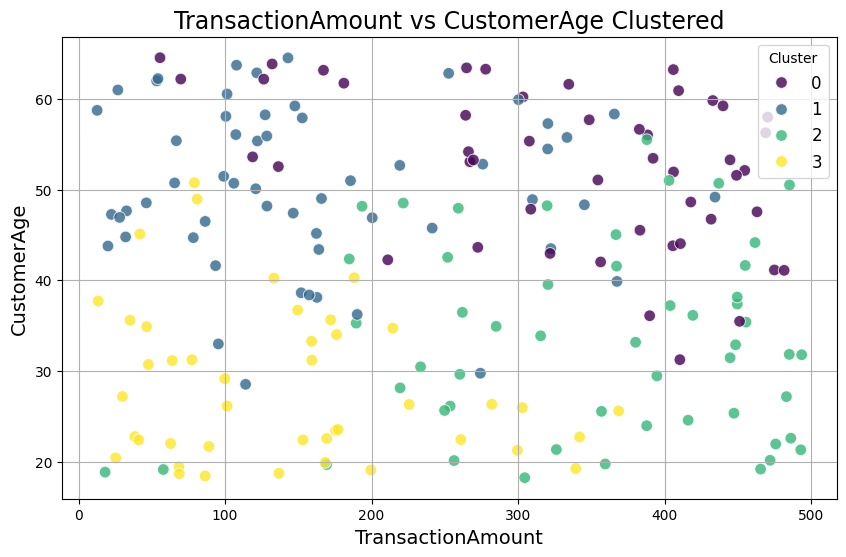

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Crear un DataFrame ficticio 
import numpy as np
np.random.seed(42)  # Para reproducibilidad

df = pd.DataFrame({
    'TransactionAmount': np.random.uniform(10, 500, 200),  # Montos de transacción
    'CustomerAge': np.random.uniform(18, 65, 200),         # Edad de los clientes
    'LoginAttempts': np.random.randint(1, 10, 200),        # Intentos de inicio de sesión
    'AccountBalance': np.random.uniform(1000, 50000, 200), # Saldo en cuenta
})

# Seleccionar columnas numéricas para clustering
numerical_columns = ['TransactionAmount', 'CustomerAge', 'LoginAttempts', 'AccountBalance']

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])

#  Aplicar KMeans para generar clusters
kmeans = KMeans(n_clusters=4, random_state=42)  # 4 clusters
df['Cluster'] = kmeans.fit_predict(scaled_data)  # Agregar columna de clusters al DataFrame

# Paso 4: Visualización de clusters
def plot_clusters(df, x_column, y_column, cluster_column):
    """
    Grafica un gráfico de dispersión de puntos coloreados por clusters.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df, 
        x=x_column, 
        y=y_column, 
        hue=cluster_column, 
        palette='viridis', 
        s=70, 
        alpha=0.8
    )
    plt.title(f'{x_column} vs {y_column} Clustered', fontsize=17)
    plt.xlabel(x_column, fontsize=14)
    plt.ylabel(y_column, fontsize=14)
    plt.legend(title=cluster_column, fontsize=12)
    plt.grid(True)
    plt.show()

# Ejemplo de uso: Graficar clusters
plot_clusters(df, x_column='TransactionAmount', y_column='CustomerAge', cluster_column='Cluster')
